## Some simple first predictions

In [24]:
# loading libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import nan

pd.set_option('display.max_columns', None)

In [31]:
# loading destatis data
path = '../data/processed/combined_data.csv'
df = pd.read_csv(path)
index_list = pd.read_csv('../data/processed/index_list_combined_data.csv')
df.index = index_list['0']

In [32]:
df.index

Index(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
       '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
       '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
       '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
       '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
       '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
       '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
       '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',

In [26]:
# defining target and features
target = 'Wert der zum Absatz bestimmten Produktion_Schokolade u.a. kakaohaltige Lebensmittelzubereit.'
features = [col for col in df.columns if col != target]
# defining X and y
X = df[features]    
y = df[target]
# checking for missing values
missing_values = df.isnull().sum()  
print("Missing values in each column:")
print(missing_values)



Missing values in each column:
Unnamed: 0                  0
Betriebe_WZ08-10            1
Betriebe_ep_WZ08-10         1
Beschäftigte_WZ08-10        1
Beschäftigte_ep_WZ08-10     1
                           ..
PCOCOUSDM                   0
PCOFFROBUSDM                0
Ferrero                    27
Mondelez                    0
LindtSpruengli             70
Length: 171, dtype: int64


In [ ]:
#### do not use yet!!!

# filling missing values with mean
df_filled = df.fillna(df.mean())
# checking for missing values after filling
missing_values_after = df_filled.isnull().sum()
print("\nMissing values after filling:")
print(missing_values_after)
# defining X and y after filling missing values
X_filled = df_filled[features]
y_filled = df_filled[target]

In [7]:
df_filled = df
X_filled = df_filled[features]
y_filled = df_filled[target]

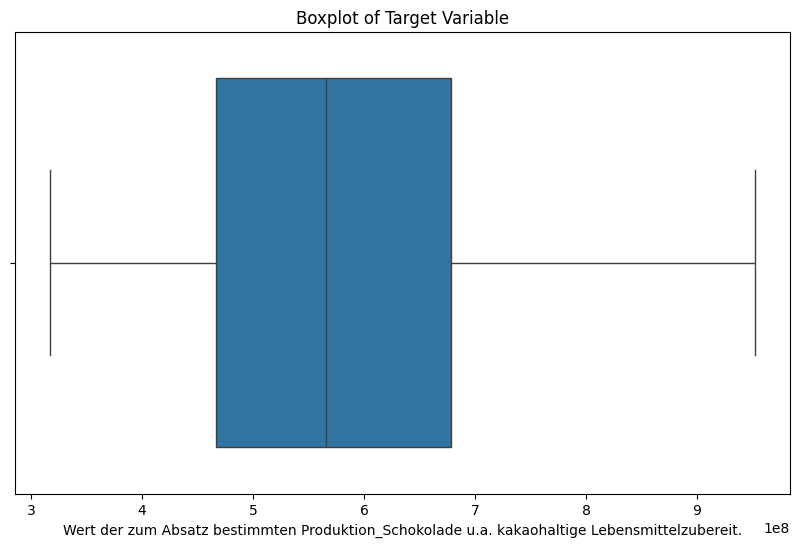

In [5]:

# checking for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filled[target])
plt.title('Boxplot of Target Variable')
plt.show()

In [8]:
# checking for outliers using z-score
from scipy import stats
z_scores = stats.zscore(y_filled)
outliers = np.where(np.abs(z_scores) > 3)[0]
print(f"Number of outliers detected using z-score: {len(outliers)}")

Number of outliers detected using z-score: 0


### Defining Baseline Model

In [33]:
features_baseline_colNo = [39, 41, 43, 45, 76, 77, 78, 79, 88, 93, 122, 126, 166, 167, 168, 169, 170]

datum = df.index
X_baseline = df.iloc[:, features_baseline_colNo]
y_baseline = df[target]
X_baseline

,Beschäftigte_WZ08-1082,Geleistete Arbeitsstunden_WZ08-1082,Bruttolohn- und -gehaltssumme_WZ08-1082,Umsatz_WZ08-1082,ErzPr_ Schokoladen und andere Süßwaren,"ErzPr_ Schokolade u.a. kakaoh. Lebensm.zub.,in Verp.>2kg","ErzPr_ Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg",ErzPr_ Süßwaren oh. Kakaogeh. (einschl.weißer Schokolade),EinfPr_ Süßwaren (ohne Dauerbackwaren),VPI_ Schokoladen,Wert der zum Absatz bestimmten Produktion_Schokolade u.a. kakaohaltige Lebensmittelzubereit.,Gewicht der zum Absatz bestimmten Produktion_kg_Schokolade u.a. kakaohaltige Lebensmittelzubereit.,PCOCOUSDM,PCOFFROBUSDM,Ferrero,Mondelez,LindtSpruengli
0,,,,,,,,,,,,,,,,,
2019-01-31,36176.0,4704000.0,111357000.0,6.619170e+08,97.0,95.6,97.6,96.5,102.4,99.2,461306000.0,115090811.0,2263.335036,78.200870,NaN,39.095000,NaN
2019-02-28,35363.0,4374000.0,106786000.0,7.964770e+08,97.0,96.1,97.6,96.5,102.3,99.9,472576000.0,106974979.0,2255.804973,78.653500,NaN,41.495000,NaN
2019-03-31,34926.0,4294000.0,106900000.0,8.120600e+08,96.9,95.9,97.4,96.5,102.5,101.1,500789000.0,108745580.0,2200.484674,76.957619,NaN,42.429048,NaN
2019-04-30,35197.0,3980000.0,102877000.0,6.919610e+08,97.0,97.4,97.5,96.5,102.3,99.8,365671000.0,90031763.0,2331.131022,73.257727,NaN,44.421250,NaN
2019-05-31,35635.0,4321000.0,120322000.0,6.131040e+08,97.0,96.2,97.5,96.5,102.4,101.0,379340000.0,91798910.0,2315.072400,71.118261,NaN,46.047045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-31,40799.0,4729000.0,149300000.0,1.183673e+09,163.6,265.5,159.3,126.4,235.0,170.2,740334000.0,112899769.0,7604.123627,198.860952,8.200000,53.416190,12.290476
2025-09-30,40849.0,5045000.0,150353000.0,1.493582e+09,164.4,249.7,163.0,126.4,226.6,172.9,951864000.0,134650790.0,7006.525856,210.841364,7.976364,53.113636,13.118182
2025-10-31,40959.0,5132000.0,156021000.0,1.573384e+09,160.9,221.1,162.3,126.4,216.4,174.1,941120000.0,129987343.0,5953.567814,215.060000,7.195652,52.461739,13.521739


In [21]:
df.index

RangeIndex(start=0, stop=84, step=1)